In [289]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import re

### Задание 1 


#### Вычислите:

<img src='Matrix_operation.png'>

In [290]:
a  = np.array([[5,7,11.3,25],[10,12,5,30]]).T
a

array([[ 5. , 10. ],
       [ 7. , 12. ],
       [11.3,  5. ],
       [25. , 30. ]])

In [291]:
7*a+2*a

array([[ 45. ,  90. ],
       [ 63. , 108. ],
       [101.7,  45. ],
       [225. , 270. ]])

### Задание 2

#### 1.Решите систему уравнений

### 3x – 2y + 5z = 7
### 7x + 4y – 8z = 3
### 5x – 3y – 4z = –12

#### Линейная или нелинейная это система? А каждое уравнение по отдельности?

In [292]:
system_eq = ["3x -2y +5z = 7","7x +4y -8z = 3","5x -3y -4z = -12"]

In [293]:
cramer_matrix = np.array([],int)
right_matrix = np.array([],int)
for i in system_eq:
    numbers = [int(i) for i in re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", i)]
    cramer_matrix = np.append(cramer_matrix, numbers[:-1])
    right_matrix = np.append(right_matrix, numbers[-1:])
    

In [294]:
cramer_matrix = cramer_matrix.reshape(-1,3)
cramer_matrix

array([[ 3, -2,  5],
       [ 7,  4, -8],
       [ 5, -3, -4]])

In [295]:
variables = ["X","Y","Z"]

if np.linalg.det(cramer_matrix):
    ans = []
    print("Right answers:")
    for i,j in enumerate(["X","Y","Z"]):
        temp = cramer_matrix.copy()
        temp[:,i] = right_matrix
        det = int(np.round(np.linalg.det(temp) / np.round(np.linalg.det(cramer_matrix))))
        ans.append(det)
        print(f"{j} = {det}")
else:
    print("No Solution!!")

Right answers:
X = 1
Y = 3
Z = 2


In [296]:
# checking
for i,j in enumerate (cramer_matrix):
    if sum(j * ans) == right_matrix[i]:
        print(f"{system_eq[i]:<17} is right, with right answers!")
    else: assert False

3x -2y +5z = 7    is right, with right answers!
7x +4y -8z = 3    is right, with right answers!
5x -3y -4z = -12  is right, with right answers!


In [297]:
# система и уравнения линейнае

#### 2.Решите систему уравнений:

### x2 + y∙x – 9 = 0
### x – y/5 = 0

#### Линейная или нелинейная это система? А каждое уравнение по отдельности?

In [298]:
# Результат решения системы ур-ний:

In [299]:
# y = 5x

In [300]:
# x*x + 5*x*x - 9 = 0

In [301]:
# 6 * x * x - 9 = 0

In [302]:
a = 6
b = 0
c = -9

discrim = (b**2) - (4 * a * c)

sol1 = ((b*-1)+discrim**0.5)/(2*a)
sol2 = ((b*-1)-discrim**0.5)/(2*a)


In [303]:
print ("Equation has 2 solutions:")
print(f"First solution:  X = {sol1:>19}, Y = {sol1*5:>18} ")
print(f"Second solution: X = {sol2:>19}, Y = {sol2*5:>18} ")

Equation has 2 solutions:
First solution:  X =  1.2247448713915892, Y =  6.123724356957946 
Second solution: X = -1.2247448713915892, Y = -6.123724356957946 


In [304]:
# система нелинейная, первое уравнение - квадратное, второе - линейное.

### Задание 3

#### Решите задачу:
#### Площадь пола прямоугольной комнаты равна 48 м2,а его периметр равен 28 м. Найдите длину и ширину комнаты.

In [305]:
# x * y = 48

In [306]:
# 2 * x + 2 * y  = 28  // transformation & simplification

In [307]:
# x = 14 - y

In [308]:
# (14 - y) * y = 48

In [309]:
# 14*y - y*y = 48

In [310]:
# y*y - 14*y  + 48 = 0

In [311]:
a = 1
b = -14
c = 48

discrim = (b**2) - (4 * a * c)

sol1 = ((b*-1)+discrim**0.5)/(2*a)
sol2 = ((b*-1)-discrim**0.5)/(2*a)

In [312]:
print ("Equation has 2 solutions:")
print(f"First solution:  X = {sol1:>3},  Y = {14 - sol1:>3} ")
print(f"Second solution: X = {sol2:>3},  Y = {14 - sol2:>3} ")
print()
print("Right answer: room's length = 8m , room's width = 6m")

Equation has 2 solutions:
First solution:  X = 8.0,  Y = 6.0 
Second solution: X = 6.0,  Y = 8.0 

Right answer: room's length = 8m , room's width = 6m


### Задание 4

#### Постройте на одном графике две кривые y(x) для функции двух
#### переменной y(k,x)=cos(k∙x), взяв для одной кривой значение k=1,
#### а для другой – любое другое k, не равное 1

In [313]:
K1 = 1 
K2 = 2

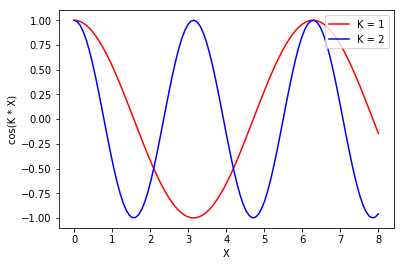

In [314]:
x = np.linspace(0,8,100)
plt.plot(x, np.cos(x * K1), color = "red", label = f"K = {K1}");
plt.plot(x, np.cos(x * K2), color = "blue", label = f"K = {K2}");
plt.xlabel("X");
plt.ylabel("cos(K * X)");
plt.legend(loc = 1);